# <center>DAT407 Assignment 3 – Group 19</center>
### <center>Avinash Shukla - 14 hours</center>
### <center>Josef Rasheed - 14 hours</center>
### <center>April 20, 2023</center>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Prepearing the data

In [47]:
# Read the dataset
df = pd.read_csv("data_assignment3.csv")
# Remove all null rows
df = df.dropna()
df

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520
...,...,...,...,...,...
29364,GLY,374,B,-147.749557,155.223562
29365,GLN,375,B,-117.428541,133.019506
29366,ILE,376,B,-113.586448,112.091970
29367,ASN,377,B,-100.668779,-12.102821


# Show the distribution of phi and psi combinations using:

# 1A
A scatter plot

In [48]:
# Defining the axis
xValues = df['phi']
yValues = df['psi']

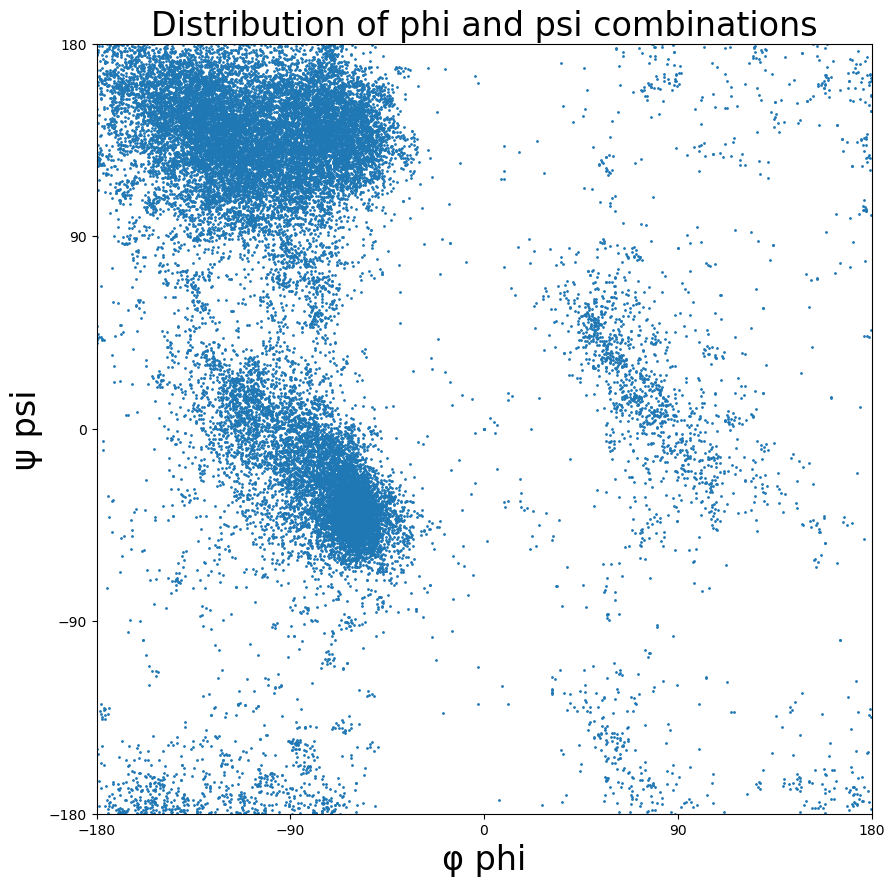

In [49]:
# Scatter plot
plt.scatter(xValues, yValues, s=1)
plt.title('Distribution of phi and psi combinations', fontsize=24)
plt.xlabel('φ phi', fontsize=24)
plt.ylabel('ψ psi', fontsize=24)
plt.gca().set_xlim([-180, 180])
plt.gca().set_ylim([-180, 180])
plt.gca().set_xticks([-180, -90, 0, 90, 180])
plt.gca().set_yticks([-180, -90, 0, 90, 180])
plt.gcf().set_size_inches(10,10)

scatter1 = plt.gcf()
plt.show()

## 1B 
A 2D histogram

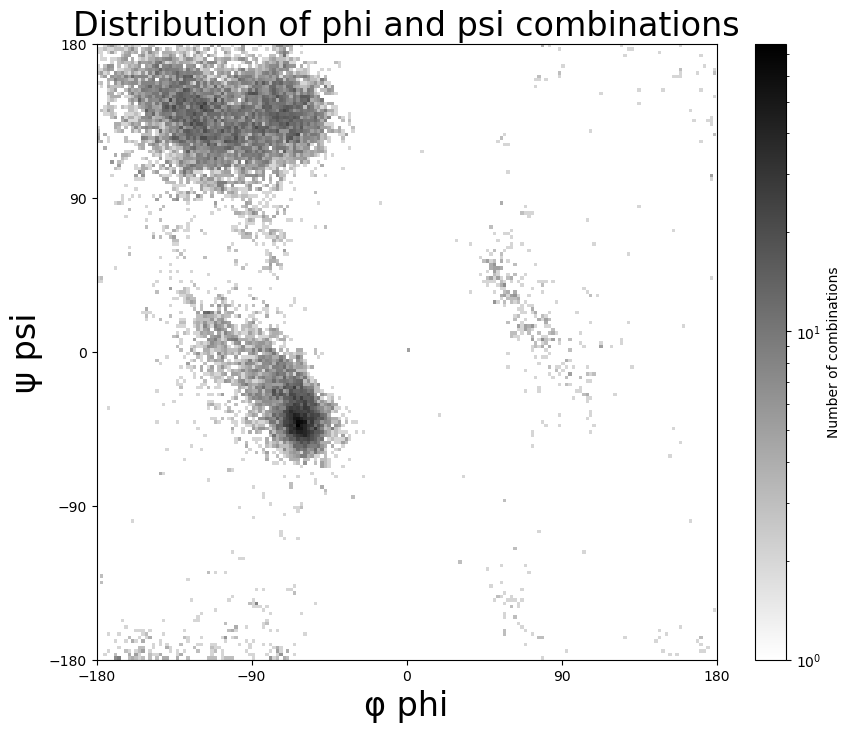

In [50]:
# 2D histogram with colors.LogNorm() to make the densities more visible
plt.hist2d(xValues, yValues, bins=180, norm = colors.LogNorm(), cmap='binary')
plt.title('Distribution of phi and psi combinations', fontsize=24)
plt.xlabel('φ phi', fontsize=24)
plt.ylabel('ψ psi', fontsize=24)
plt.gca().set_xlim([-180, 180])
plt.gca().set_ylim([-180, 180])
plt.gca().set_xticks([-180, -90, 0, 90 , 180])
plt.gca().set_yticks([-180, -90, 0, 90 , 180])
plt.gcf().set_size_inches(10,8)

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of combinations')

plt.show()

## 1C

To take into consideration that this data has toroidal properties, we can shift the data to a 360 degree space. To do this we first need to find the appropriate points that should be transformed.

If we look at our current plot, we see that x = 150 and y = -125 are good places for shifting since the data after these points seem to fit nicely with the other sides of the plot. So what we'll do is shift the data so that x = 150 and y = -125 now are considered the 360 and 0 degree points respectively. This happens when taking x = 150 + 210 and y = -125 + 125. So we add 210 and 150 to x and y respectively. Then we apply modulu 360 on the data to make all points that go out of the range of 360 degrees fit back in to the correct coordinates on the other sides of the plot. For example 160 + 210 = 370, 370 % 360 = 10. This means that the 370 point now wraps around and becomes the 10 point on the other side.

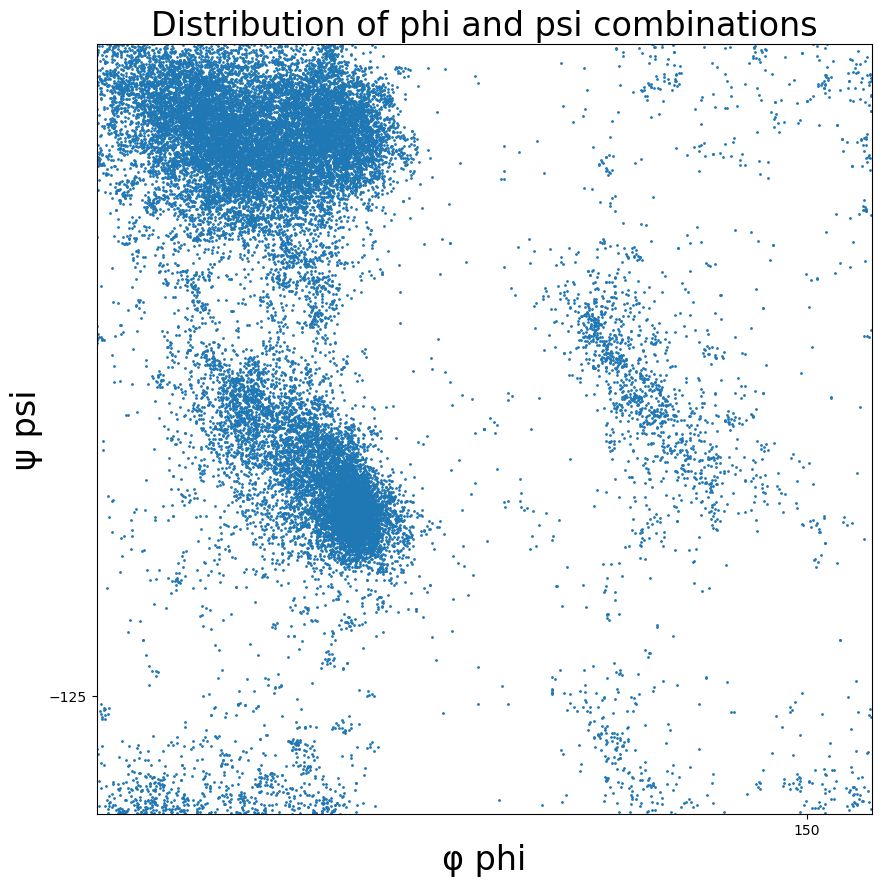

In [51]:
scatter1.gca().set_xticks([150])
scatter1.gca().set_yticks([-125])
scatter1

In [52]:
# Read the dataset
transformed = pd.read_csv("data_assignment3.csv")
# Remove all null rows
transformed = transformed.dropna()

# Add 210 to all phi values
transformed['phi'] = transformed['phi'] + 210
# Add 125 to all psi values
transformed['psi'] = transformed['psi'] + 125

# Apply Modulo 360 to all phi and psi values to ensure a range of 0 - 360 degrees
transformed['phi'] = transformed['phi'] % 360
transformed['psi'] = transformed['psi'] % 360

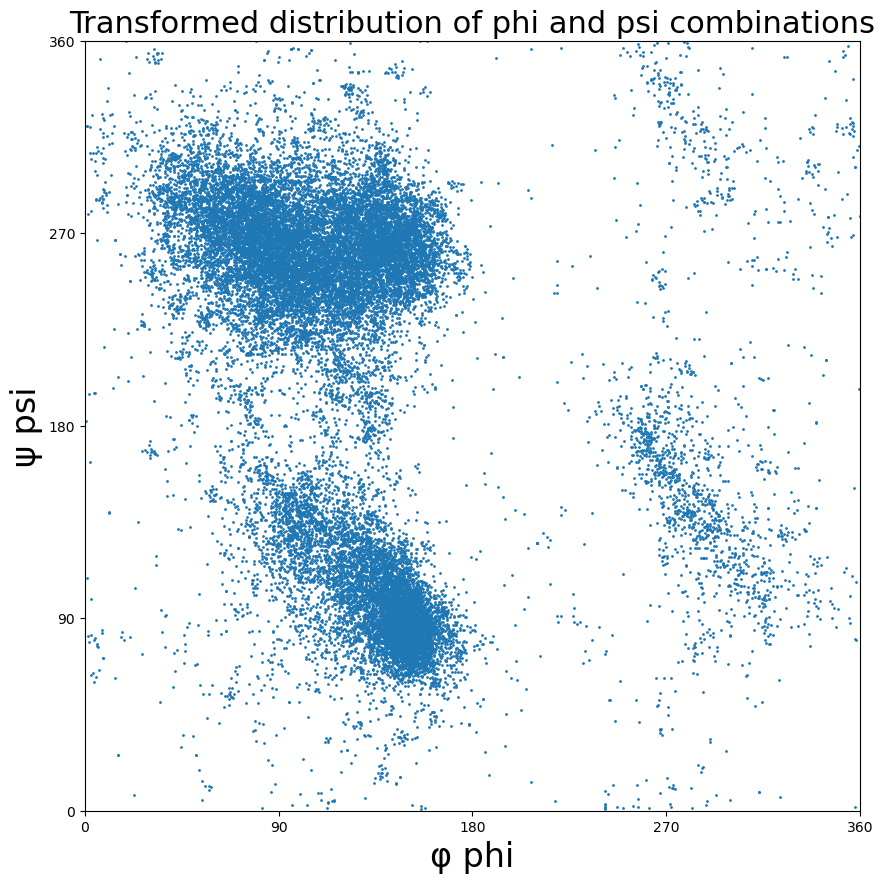

In [53]:
# Defining the axis
xValues = transformed['phi']
yValues = transformed['psi']

# Scatter plot
plt.scatter(xValues, yValues, s=1)
plt.title('Transformed distribution of phi and psi combinations', fontsize=22)
plt.xlabel('φ phi', fontsize=24)
plt.ylabel('ψ psi', fontsize=24)
plt.gca().set_xlim([0, 360])
plt.gca().set_ylim([0, 360])
plt.gca().set_xticks([0, 90, 180, 270, 360])
plt.gca().set_yticks([0, 90, 180, 270, 360])
plt.gcf().set_size_inches(10,10)

plt.show()

We now have a very nice transformed dataset that we could use to get better clustering results.

# Use the K-means clustering method to cluster the phi and psi angle combinations in the data file

# 2A

Use an appropriate method to evaluate which value of K that gives the best
clustering.

The elbow method is a good way to find the best value for k that gives the best clustering. When looking at our current plots we see that there are approximately 2 - 4 clusters. So we think an appropriate range for k to test is 1 - 9. We will use the "inertia" attribute of sklearns k-means for the distance.

In [54]:
# Make a 2D array with with phi and psi to be used by the clustering methods
clustering_set = transformed.loc[:, ['phi', 'psi']]
clustering_set

,phi,psi
0,60.687145,267.657714
1,165.716790,261.002076
2,90.027379,316.294737
3,74.682788,262.143523
4,105.148533,220.928520
...,...,...
29364,62.250443,280.223562
29365,92.571459,258.019506
29366,96.413552,237.091970
29367,109.331221,112.897179


In [55]:
ks = range(1, 10)

inertias = []

for k in ks:
    # Fit the data
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(clustering_set)

    inertias.append(kmeans.inertia_)

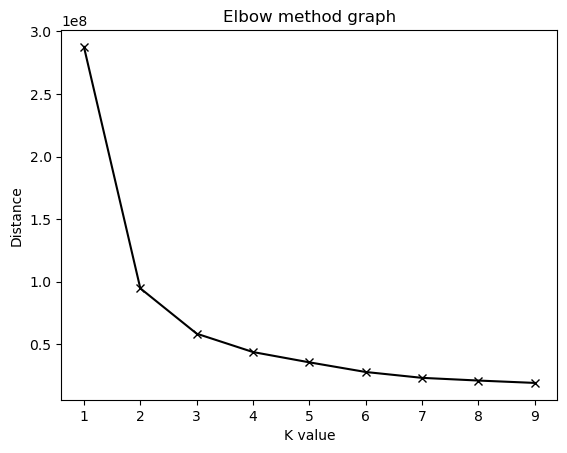

In [56]:

plt.plot(ks, inertias, color='black', marker='x', linestyle='solid')
plt.xlabel('K value')
plt.ylabel('Distance')
plt.title('Elbow method graph')
plt.show()

By eye, we find that 3 clusters seem to be the most reasonable. The elbow graph suggests k = 2 to be the best value. Lets plot the clusters for k 2 - 4 and see how it looks.

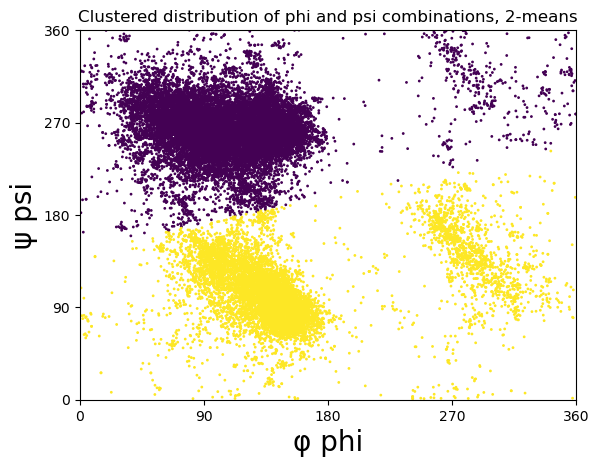

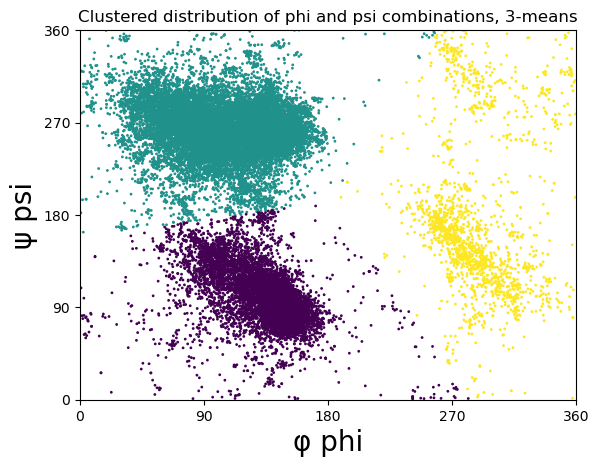

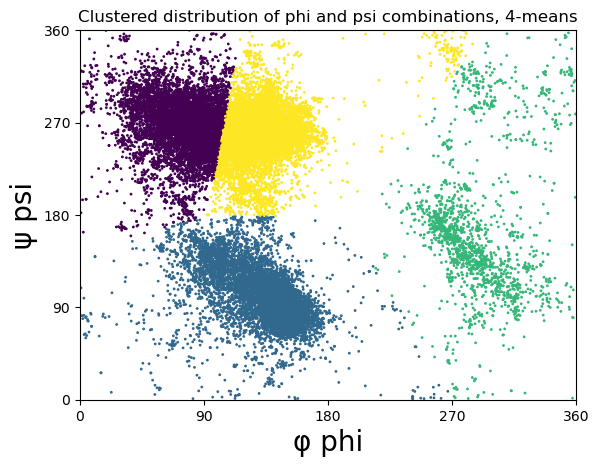

In [101]:
ks = range(2, 5)

for k in ks:
    # The k-means model
    kmeans = KMeans(n_clusters=k, n_init=10).fit(clustering_set)

    # Get the labels of each point
    labels = kmeans.labels_

    # Defining the axis
    xValues = clustering_set['phi']
    yValues = clustering_set['psi']

    # create a scatter plot of the data with colors assigned based on labels
    plt.scatter(xValues, yValues, c=labels, s=1)
    plt.title('Clustered distribution of phi and psi combinations, ' + str(k) + '-means')
    plt.xlabel('φ phi', fontsize=20)
    plt.ylabel('ψ psi', fontsize=20)
    plt.gca().set_xlim([0, 360])
    plt.gca().set_ylim([0, 360])
    plt.gca().set_xticks([0, 90, 180, 270, 360])
    plt.gca().set_yticks([0, 90, 180, 270, 360])

    plt.show()

# 2B

Do the clusters found in part (a) seem reasonable?

Only the 3-means clusters seems reasonable, which makes sense, especially when looking at our 2D histogram. Although we also seem to have clustered in all the outliers which makes sense for K-means

# 3 A and B

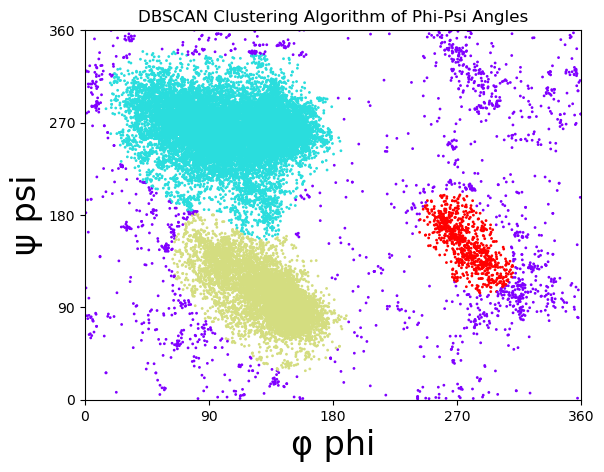

In [80]:
# Extracting the feature columns.
X = clustering_set[['phi', 'psi']]

# Standardize the feature set.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Set DBSCAN hyperparameters
# We played around with eps and min_samples untill we found values that gave us 3 clusters and good borders for the clusters that did not include alot of outliers
eps = 0.25
min_samples = 200

# DBSCAN clustering algorithm.
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_std)

# Visualize resulting clusters
plt.scatter(X['phi'], X['psi'], c=labels, cmap='rainbow', s=1)
plt.xlabel('φ phi', fontsize=24)
plt.ylabel('ψ psi', fontsize=24)
plt.gca().set_xlim([0, 360])
plt.gca().set_ylim([0, 360])
plt.gca().set_xticks([0, 90, 180, 270, 360])
plt.gca().set_yticks([0, 90, 180, 270, 360])
plt.title('DBSCAN 3 clusters of Phi-Psi Angles')
db_scatter = plt.gcf()
plt.show()


# 3C

In [59]:
# Count the number of outliers
num_outliers = (labels == -1).sum()
print("Number of outliers: ", num_outliers)

Number of outliers:  1621


      residue name  position chain         phi         psi  label
0              LYS        10     A   60.687145  267.657714      0
1              PRO        11     A  165.716790  261.002076      0
2              LYS        12     A   90.027379  316.294737      0
3              LEU        13     A   74.682788  262.143523      0
4              LEU        14     A  105.148533  220.928520      0
...            ...       ...   ...         ...         ...    ...
29364          GLY       374     B   62.250443  280.223562      0
29365          GLN       375     B   92.571459  258.019506      0
29366          ILE       376     B   96.413552  237.091970      0
29367          ASN       377     B  109.331221  112.897179      1
29368          LYS       378     B   40.048760  219.233680      0

[29369 rows x 6 columns]
[33, 33, 24, 64, 12, 48, 108, 794, 42, 42, 34, 8, 16, 117, 45, 5, 28, 74, 18, 76]


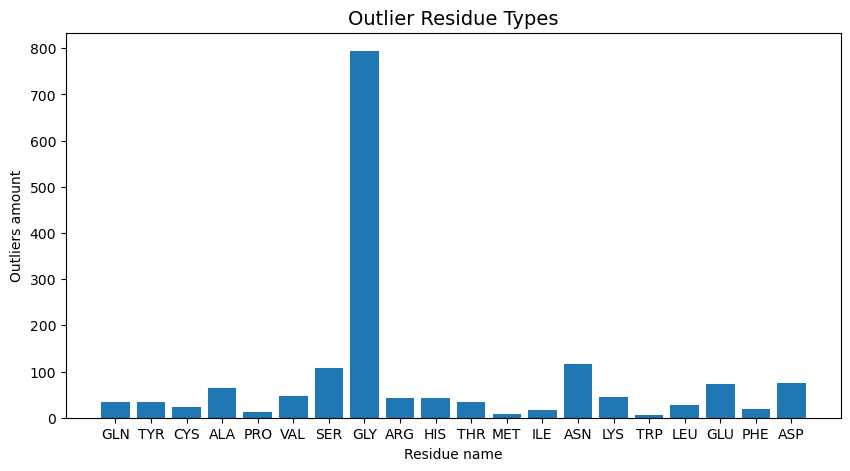

In [60]:
# Make a list all residue names for display
names = list(set(outliers['residue name']))

# Assign each residue with its label
transformed['label'] = labels
print(transformed)

# Get all outlier residues
outlier_residues = transformed[transformed['label'] == -1]

# Number of outliers for each residue name in an array
residue_outliers_amount = []
# For each residue type, add the outlier amount to the above array
for name in names:
    cur = outlier_residues['residue name'] == name
    residue_outliers_amount.append(len(outlier_residues[cur]))
    
print(residue_outliers_amount)

# Defining the axis
xValues = names
yValues = residue_outliers_amount

# Bar chart
plt.bar(xValues, yValues)
plt.title("Outlier Residue Types", size=14)
plt.xlabel("Residue name")
plt.ylabel("Outliers amount")
plt.gcf().set_size_inches(10,5)
plt.show()

# 3D

Compare the clusters found by DBSCAN with those found using K-means.
What are the pros and cons comparing DBSCAN and K-means for clustering?

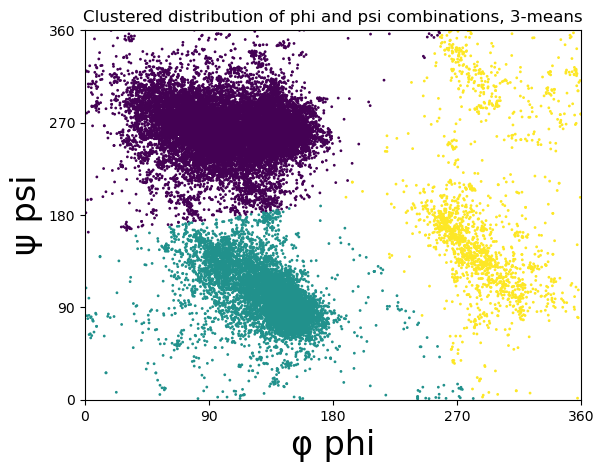

In [75]:
kmeans = KMeans(n_clusters=3, n_init=10).fit(clustering_set)

# Get the labels of each point
labels = kmeans.labels_

# Defining the axis
xValues = clustering_set['phi']
yValues = clustering_set['psi']

# create a scatter plot of the data with colors assigned based on labels
plt.scatter(xValues, yValues, c=labels, s=1)
plt.title('Clustered distribution of phi and psi combinations, ' + str(3) + '-means')
plt.xlabel('φ phi', fontsize=24)
plt.ylabel('ψ psi', fontsize=24)
plt.gca().set_xlim([0, 360])
plt.gca().set_ylim([0, 360])
plt.gca().set_xticks([0, 90, 180, 270, 360])
plt.gca().set_yticks([0, 90, 180, 270, 360])

plt.show()

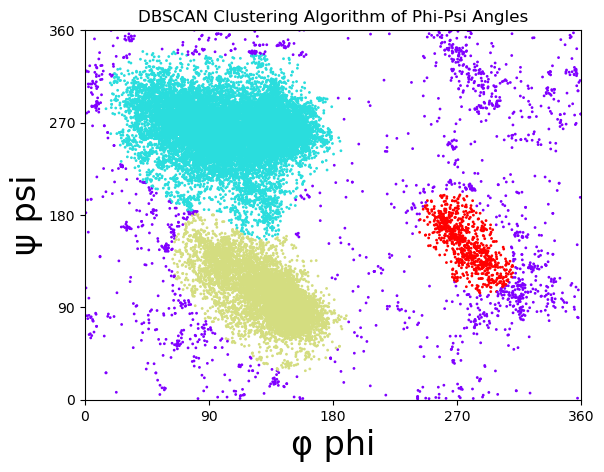

In [81]:
db_scatter

DBSCAN suits this data much better than K-means since we have a lot of outliers and the different clusters have different variances and are not equally large. K-means was however faster to run and it was wasier to find a good k than finding good eps and min_samples.

# 4

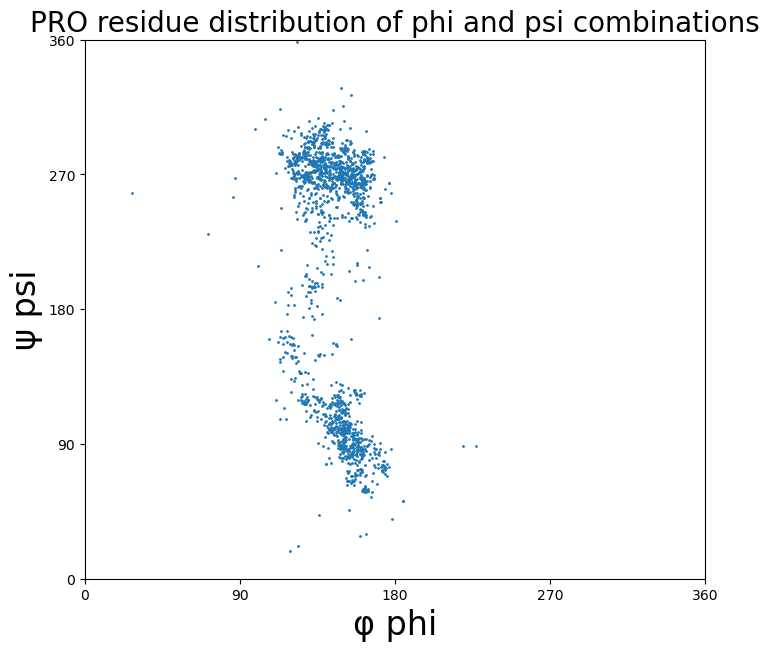

In [102]:
# make a dataset containing only the 'PRO' residue
shifted_pro = shifted[shifted['residue name'] == 'PRO']

# Defining the axis
xValues = shifted_pro['phi']
yValues = shifted_pro['psi']

# Scatter plot
plt.scatter(xValues, yValues, s=1)
plt.title('PRO residue distribution of phi and psi combinations', fontsize=20)
plt.xlabel('φ phi', fontsize=24)
plt.ylabel('ψ psi', fontsize=24)
plt.gca().set_xlim([0, 360])
plt.gca().set_ylim([0, 360])
plt.gca().set_xticks([0, 90, 180, 270, 360])
plt.gca().set_yticks([0, 90, 180, 270, 360])
plt.gcf().set_size_inches(8,7)

plt.show()

There seems to be 2 clusters with a lower density than with all the data which makes sense. So we will probably have to adjust our parameters to be a bit lower to get the desired results.

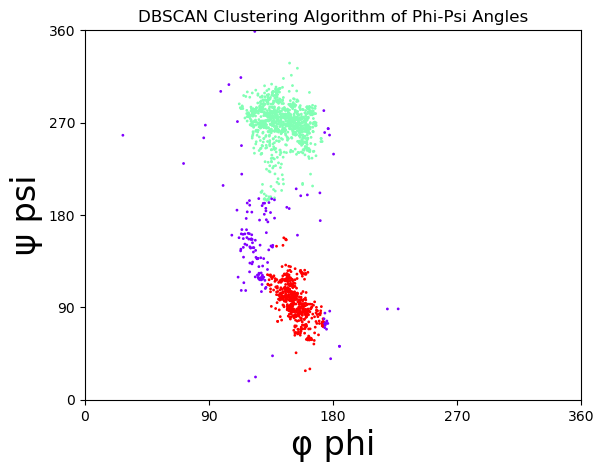

In [100]:
# Extracting the feature columns.
X = shifted_pro[['phi', 'psi']]

# Standardize the feature set.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Set DBSCAN hyperparameters
eps = 0.38
min_samples = 50

# DBSCAN clustering algorithm.
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_std)

# Visualize resulting clusters
plt.scatter(X['phi'], X['psi'], c=labels, cmap='rainbow', s=1)
plt.xlabel('φ phi', fontsize=24)
plt.ylabel('ψ psi', fontsize=24)
plt.gca().set_xlim([0, 360])
plt.gca().set_ylim([0, 360])
plt.gca().set_xticks([0, 90, 180, 270, 360])
plt.gca().set_yticks([0, 90, 180, 270, 360])
plt.title('DBSCAN Clustering Algorithm of Phi-Psi Angles')
db_scatter = plt.gcf()
plt.show()

After adjusting the parameters we get 2 clusters with some outliers in the middle. We can also see that there seems to be zero "PRO" residues drom the red cluster from the previous DBSCAN we did an the full data.